# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import DataFrame

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


# Importing data

In [6]:
df = pd.read_csv('C:\\Users\\Karan\\Documents\\spam.csv')
df.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.info

<bound method DataFrame.info of      Label                                          EmailText
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham             Will Ã_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

# creating train and test data

In [8]:
y_train =  df.iloc[0:50,0]
y_train

0      ham
1      ham
2     spam
3      ham
4      ham
5     spam
6      ham
7      ham
8     spam
9     spam
10     ham
11    spam
12    spam
13     ham
14     ham
15    spam
16     ham
17     ham
18     ham
19    spam
20     ham
21     ham
22     ham
23     ham
24     ham
25     ham
26     ham
27     ham
28     ham
29     ham
30     ham
31     ham
32     ham
33     ham
34    spam
35     ham
36     ham
37     ham
38     ham
39     ham
40     ham
41     ham
42    spam
43     ham
44     ham
45     ham
46     ham
47     ham
48     ham
49     ham
Name: Label, dtype: object

In [9]:
X_train = df.iloc[0:50,1]
X_train


0     Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup fina...
3     U dun say so early hor... U c already then say...
4     Nah I don't think he goes to usf, he lives aro...
5     FreeMsg Hey there darling it's been 3 week's n...
6     Even my brother is not like to speak with me. ...
7     As per your request 'Melle Melle (Oru Minnamin...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
10    I'm gonna be home soon and i don't want to tal...
11    SIX chances to win CASH! From 100 to 20,000 po...
12    URGENT! You have won a 1 week FREE membership ...
13    I've been searching for the right words to tha...
14                  I HAVE A DATE ON SUNDAY WITH WILL!!
15    XXXMobileMovieClub: To use your credit, click ...
16                           Oh k...i'm watching here:)
17    Eh u remember how 2 spell his name... Yes 

In [10]:
y_test =  df.iloc[51:61,0]
y_test

5001     ham
5002    spam
5003     ham
5004     ham
5005     ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Label, Length: 571, dtype: object

In [54]:
X_test =  df.iloc[51:61,1]
X_test

51    A gram usually runs like  &lt;#&gt; , a half e...
52    K fyi x has a ride early tomorrow morning but ...
53    Wow. I never realized that you were so embaras...
54    SMS. ac Sptv: The New Jersey Devils and the De...
55    Do you know what Mallika Sherawat did yesterda...
56    Congrats! 1 year special cinema pass for 2 is ...
57                   Sorry, I'll call later in meeting.
58                               Tell where you reached
59             Yes..gauti and sehwag out of odi series.
60    Your gonna have to pick up a $1 burger for you...
Name: EmailText, dtype: object

# Data Cleaning 

In [55]:
import nltk
#nltk.download()


# lower case

In [56]:
import string 
raw = [doc.lower() for doc in X_train]
print(raw)

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...', 'ok lar... joking wif u oni...', "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's", 'u dun say so early hor... u c already then say...', "nah i don't think he goes to usf, he lives around here though", "freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, ã¥â£1.50 to rcv", 'even my brother is not like to speak with me. they treat me like aids patent.', "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune", 'winner!! as a valued network customer you have been selected to receivea ã¥â£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.', 'had your m

In [57]:
import string 
test = [doc.lower() for doc in X_test]
print(test)

['a gram usually runs like  &lt;#&gt; , a half eighth is smarter though and gets you almost a whole second gram for  &lt;#&gt;', "k fyi x has a ride early tomorrow morning but he's crashing at our place tonight", 'wow. i never realized that you were so embarassed by your accomodations. i thought you liked it, since i was doing the best i could and you always seemed so happy about \\the cave\\". i\'m sorry i didn\'t and don\'t have more to give. i\'m sorry i offered. i\'m sorry your room was so embarassing."', 'sms. ac sptv: the new jersey devils and the detroit red wings play ice hockey. correct or incorrect? end? reply end sptv', 'do you know what mallika sherawat did yesterday? find out now @  &lt;url&gt;', 'congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! c suprman v, matrix3, starwars3, etc all 4 free! bx420-ip4-5we. 150pm. dont miss out! ', "sorry, i'll call later in meeting.", 'tell where you reached', 'yes..gauti and sehwag out of odi series.', "your go

# Tokenization

In [58]:
#word tokenization
from nltk.tokenize import word_tokenize
tokenized_data = [word_tokenize(doc) for doc in raw]
print(tokenized_data)

#sentence tokenization
from nltk.tokenize import sent_tokenize

raw2 = [sent_tokenize(doc) for doc in raw]
print(raw2)

[['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...'], ['ok', 'lar', '...', 'joking', 'wif', 'u', 'oni', '...'], ['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005.', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', '(', 'std', 'txt', 'rate', ')', 't', '&', 'c', "'s", 'apply', '08452810075over18', "'s"], ['u', 'dun', 'say', 'so', 'early', 'hor', '...', 'u', 'c', 'already', 'then', 'say', '...'], ['nah', 'i', 'do', "n't", 'think', 'he', 'goes', 'to', 'usf', ',', 'he', 'lives', 'around', 'here', 'though'], ['freemsg', 'hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'i', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'tb', 'ok', '!', 'xxx', 'std', 'chgs', 'to', 'send', ',', 'ã¥â£1.50', 'to', 'rcv

In [59]:
from nltk.tokenize import word_tokenize
test1 = [word_tokenize(doc) for doc in test]
print(test1)

[['a', 'gram', 'usually', 'runs', 'like', '&', 'lt', ';', '#', '&', 'gt', ';', ',', 'a', 'half', 'eighth', 'is', 'smarter', 'though', 'and', 'gets', 'you', 'almost', 'a', 'whole', 'second', 'gram', 'for', '&', 'lt', ';', '#', '&', 'gt', ';'], ['k', 'fyi', 'x', 'has', 'a', 'ride', 'early', 'tomorrow', 'morning', 'but', 'he', "'s", 'crashing', 'at', 'our', 'place', 'tonight'], ['wow', '.', 'i', 'never', 'realized', 'that', 'you', 'were', 'so', 'embarassed', 'by', 'your', 'accomodations', '.', 'i', 'thought', 'you', 'liked', 'it', ',', 'since', 'i', 'was', 'doing', 'the', 'best', 'i', 'could', 'and', 'you', 'always', 'seemed', 'so', 'happy', 'about', '\\the', 'cave\\', "''", '.', 'i', "'m", 'sorry', 'i', 'did', "n't", 'and', 'do', "n't", 'have', 'more', 'to', 'give', '.', 'i', "'m", 'sorry', 'i', 'offered', '.', 'i', "'m", 'sorry', 'your', 'room', 'was', 'so', 'embarassing', '.', "''"], ['sms', '.', 'ac', 'sptv', ':', 'the', 'new', 'jersey', 'devils', 'and', 'the', 'detroit', 'red', 'wing

# Punctuation removal

In [60]:
import re 
regex = re.compile('[%s]'% re.escape(string.punctuation))

raw3 = []
for review in tokenized_data :
    new_review = []
    for token in review:
        new_token = regex.sub(u'',token)
        if not new_token == u'':
            new_review.append(new_token)
    raw3.append(new_review)

print(raw3)

[['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'u', 'oni'], ['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', '08452810075over18', 's'], ['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say'], ['nah', 'i', 'do', 'nt', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though'], ['freemsg', 'hey', 'there', 'darling', 'it', 's', 'been', '3', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'i', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'ã¥â£150', 'to', 'rcv'], ['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me'

In [61]:
import re 
regex = re.compile('[%s]'% re.escape(string.punctuation))

test2 = []
for review in test1 :
    new_review = []
    for token in review:
        new_token = regex.sub(u'',token)
        if not new_token == u'':
            new_review.append(new_token)
    test2.append(new_review)

print(test2)

[['a', 'gram', 'usually', 'runs', 'like', 'lt', 'gt', 'a', 'half', 'eighth', 'is', 'smarter', 'though', 'and', 'gets', 'you', 'almost', 'a', 'whole', 'second', 'gram', 'for', 'lt', 'gt'], ['k', 'fyi', 'x', 'has', 'a', 'ride', 'early', 'tomorrow', 'morning', 'but', 'he', 's', 'crashing', 'at', 'our', 'place', 'tonight'], ['wow', 'i', 'never', 'realized', 'that', 'you', 'were', 'so', 'embarassed', 'by', 'your', 'accomodations', 'i', 'thought', 'you', 'liked', 'it', 'since', 'i', 'was', 'doing', 'the', 'best', 'i', 'could', 'and', 'you', 'always', 'seemed', 'so', 'happy', 'about', 'the', 'cave', 'i', 'm', 'sorry', 'i', 'did', 'nt', 'and', 'do', 'nt', 'have', 'more', 'to', 'give', 'i', 'm', 'sorry', 'i', 'offered', 'i', 'm', 'sorry', 'your', 'room', 'was', 'so', 'embarassing'], ['sms', 'ac', 'sptv', 'the', 'new', 'jersey', 'devils', 'and', 'the', 'detroit', 'red', 'wings', 'play', 'ice', 'hockey', 'correct', 'or', 'incorrect', 'end', 'reply', 'end', 'sptv'], ['do', 'you', 'know', 'what', '

# Removing stopwords

In [62]:
from nltk.corpus import stopwords

raw4 = []

for doc in raw3:
    new_term_vector = []
    for word in doc:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)
            
    raw4.append(new_term_vector)

print(raw4)

[['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'u', 'oni'], ['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', '08452810075over18'], ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'], ['nah', 'nt', 'think', 'goes', 'usf', 'lives', 'around', 'though'], ['freemsg', 'hey', 'darling', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'ã¥â£150', 'rcv'], ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent'], ['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', '9', 'copy', 'friends', 'callertune'], ['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'ã¥â£900', 'prize', 'reward'

In [63]:
from nltk.corpus import stopwords

test3 = []

for doc in test2:
    new_term_vector = []
    for word in doc:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)
            
    test3.append(new_term_vector)

print(test3)

[['gram', 'usually', 'runs', 'like', 'lt', 'gt', 'half', 'eighth', 'smarter', 'though', 'gets', 'almost', 'whole', 'second', 'gram', 'lt', 'gt'], ['k', 'fyi', 'x', 'ride', 'early', 'tomorrow', 'morning', 'crashing', 'place', 'tonight'], ['wow', 'never', 'realized', 'embarassed', 'accomodations', 'thought', 'liked', 'since', 'best', 'could', 'always', 'seemed', 'happy', 'cave', 'sorry', 'nt', 'nt', 'give', 'sorry', 'offered', 'sorry', 'room', 'embarassing'], ['sms', 'ac', 'sptv', 'new', 'jersey', 'devils', 'detroit', 'red', 'wings', 'play', 'ice', 'hockey', 'correct', 'incorrect', 'end', 'reply', 'end', 'sptv'], ['know', 'mallika', 'sherawat', 'yesterday', 'find', 'lt', 'url', 'gt'], ['congrats', '1', 'year', 'special', 'cinema', 'pass', '2', 'call', '09061209465', 'c', 'suprman', 'v', 'matrix3', 'starwars3', 'etc', '4', 'free', 'bx420ip45we', '150pm', 'dont', 'miss'], ['sorry', 'call', 'later', 'meeting'], ['tell', 'reached'], ['yes', 'gauti', 'sehwag', 'odi', 'series'], ['gon', 'na', 

# Stemming and Lemmatization

In [64]:
from nltk.stem.porter import PorterStemmer 
from nltk.stem.wordnet import WordNetLemmatizer

In [65]:
porter = PorterStemmer()
wordnet = WordNetLemmatizer()

In [66]:
raw5 = []
for doc in raw4:
    final_doc = []
    for word in doc:
        final_doc.append(porter.stem(word))
    
    
        raw5.append(final_doc)
                         
                         
print(raw5)

[['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got',

In [67]:
test4 = []
for doc in test3:
    final_doc = []
    for word in doc:
        final_doc.append(porter.stem(word))
    
    
        test4.append(final_doc)
                         
                         
print(test4)

[['gram', 'usual', 'run', 'like', 'lt', 'gt', 'half', 'eighth', 'smarter', 'though', 'get', 'almost', 'whole', 'second', 'gram', 'lt', 'gt'], ['gram', 'usual', 'run', 'like', 'lt', 'gt', 'half', 'eighth', 'smarter', 'though', 'get', 'almost', 'whole', 'second', 'gram', 'lt', 'gt'], ['gram', 'usual', 'run', 'like', 'lt', 'gt', 'half', 'eighth', 'smarter', 'though', 'get', 'almost', 'whole', 'second', 'gram', 'lt', 'gt'], ['gram', 'usual', 'run', 'like', 'lt', 'gt', 'half', 'eighth', 'smarter', 'though', 'get', 'almost', 'whole', 'second', 'gram', 'lt', 'gt'], ['gram', 'usual', 'run', 'like', 'lt', 'gt', 'half', 'eighth', 'smarter', 'though', 'get', 'almost', 'whole', 'second', 'gram', 'lt', 'gt'], ['gram', 'usual', 'run', 'like', 'lt', 'gt', 'half', 'eighth', 'smarter', 'though', 'get', 'almost', 'whole', 'second', 'gram', 'lt', 'gt'], ['gram', 'usual', 'run', 'like', 'lt', 'gt', 'half', 'eighth', 'smarter', 'though', 'get', 'almost', 'whole', 'second', 'gram', 'lt', 'gt'], ['gram', 'us

In [68]:
raw6 = []
for doc in raw5:
    final_doc = []
    for word in doc:
        final_doc.append(wordnet.lemmatize(word))
    
    
        raw6.append(final_doc)
                         
                         
print(raw6)

[['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got',

In [69]:
test5 = []
for doc in test4:
    final_doc = []
    for word in doc:
        final_doc.append(wordnet.lemmatize(word))
    
    
        test5.append(final_doc)
                         
                         
print(test5)

[['gram', 'usual', 'run', 'like', 'lt', 'gt', 'half', 'eighth', 'smarter', 'though', 'get', 'almost', 'whole', 'second', 'gram', 'lt', 'gt'], ['gram', 'usual', 'run', 'like', 'lt', 'gt', 'half', 'eighth', 'smarter', 'though', 'get', 'almost', 'whole', 'second', 'gram', 'lt', 'gt'], ['gram', 'usual', 'run', 'like', 'lt', 'gt', 'half', 'eighth', 'smarter', 'though', 'get', 'almost', 'whole', 'second', 'gram', 'lt', 'gt'], ['gram', 'usual', 'run', 'like', 'lt', 'gt', 'half', 'eighth', 'smarter', 'though', 'get', 'almost', 'whole', 'second', 'gram', 'lt', 'gt'], ['gram', 'usual', 'run', 'like', 'lt', 'gt', 'half', 'eighth', 'smarter', 'though', 'get', 'almost', 'whole', 'second', 'gram', 'lt', 'gt'], ['gram', 'usual', 'run', 'like', 'lt', 'gt', 'half', 'eighth', 'smarter', 'though', 'get', 'almost', 'whole', 'second', 'gram', 'lt', 'gt'], ['gram', 'usual', 'run', 'like', 'lt', 'gt', 'half', 'eighth', 'smarter', 'though', 'get', 'almost', 'whole', 'second', 'gram', 'lt', 'gt'], ['gram', 'us

In [70]:
gh = DataFrame(raw5)
gh

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,go,jurong,point,crazi,avail,bugi,n,great,world,la,...,wat,None,None,None,None,None,None,None,None,None
1,go,jurong,point,crazi,avail,bugi,n,great,world,la,...,wat,None,None,None,None,None,None,None,None,None
2,go,jurong,point,crazi,avail,bugi,n,great,world,la,...,wat,None,None,None,None,None,None,None,None,None
3,go,jurong,point,crazi,avail,bugi,n,great,world,la,...,wat,None,None,None,None,None,None,None,None,None
4,go,jurong,point,crazi,avail,bugi,n,great,world,la,...,wat,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,u,nt,know,stubborn,nt,even,want,go,hospit,kept,...,weak,sucker,None,None,None,None,None,None,None,None
527,u,nt,know,stubborn,nt,even,want,go,hospit,kept,...,weak,sucker,None,None,None,None,None,None,None,None
528,u,nt,know,stubborn,nt,even,want,go,hospit,kept,...,weak,sucker,None,None,None,None,None,None,None,None
529,u,nt,know,stubborn,nt,even,want,go,hospit,kept,...,weak,sucker,None,None,None,None,None,None,None,None


In [71]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords


In [72]:
import nltk

In [73]:
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
ps = PorterStemmer()


In [74]:
def getCleanedText(text):
    text = text.lower()
    
    #tokenize
    tokens = tokenizer.tokenize(text)
    new_tokens = [token for token in tokens if token not in en_stop]
    stem_token = [ps.stem(tokens)for tokens in new_tokens]
    
    clean_text = " ".join(stem_token)
    return clean_text

In [75]:
X_clean = [getCleanedText(i) for i in X_train]
Xt_clean = [getCleanedText(i) for i in X_test]

In [76]:
X_clean

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send ã â 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea ã â 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week 

In [78]:
Xt_clean


['gram usual run like lt gt half eighth smarter though get almost whole second gram lt gt',
 'k fyi x ride earli tomorrow morn crash place tonight',
 'wow never realiz embarass accomod thought like sinc best could alway seem happi cave sorri give sorri offer sorri room embarass',
 'sm ac sptv new jersey devil detroit red wing play ice hockey correct incorrect end repli end sptv',
 'know mallika sherawat yesterday find lt url gt',
 'congrat 1 year special cinema pass 2 call 09061209465 c suprman v matrix3 starwars3 etc 4 free bx420 ip4 5we 150pm dont miss',
 'sorri call later meet',
 'tell reach',
 'ye gauti sehwag odi seri',
 'gonna pick 1 burger way home even move pain kill']

# vectorization

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (1,2))

In [80]:
X_vec = cv.fit_transform(X_clean).toarray()

In [81]:
X_vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [82]:
print(cv.get_feature_names())

['000', '000 pound', '000 prize', '07732584351', '07732584351 rodger', '08000930705', '08000930705 deliveri', '08002986030', '08452810075over18', '09061701461', '09061701461 claim', '100', '100 000', '100 20', '11', '11 month', '12', '12 hour', '150p', '150p day', '16', '16 tsandc', '20', '20 000', '20 poboxox36504w45wq', '2005', '2005 text', '21st', '21st may', '2nd', '2nd may', '4403ldnw1a7rw18', '4txt', '4txt â¼1', '50', '50 rcv', '6day', '6day 16', '81010', '81010 www', '87077', '87077 eg', '87077 tri', '87121', '87121 receiv', '87575', '87575 cost', '8am', '900', '900 prize', 'abiola', 'actin', 'actin like', 'aft', 'aft finish', 'ahead', 'ahead watt', 'ahhh', 'ahhh work', 'aid', 'aid patent', 'alreadi', 'alreadi say', 'alright', 'alright way', 'alway', 'alway convinc', 'amor', 'amor wat', 'amp', 'amp pack', 'anymor', 'anymor tonight', 'anyth', 'anyth go', 'anyth lor', 'anyth tomo', 'apologet', 'apologet fallen', 'appli', 'appli 08452810075over18', 'appli repli', 'arabian', 'arabia

In [85]:
xt_vec = cv.transform(Xt_clean).toarray()

# Multinomial Naive Bayes

In [83]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()

In [84]:
mn.fit(X_vec,y_train)

MultinomialNB()

In [86]:
y_pred = mn.predict(xt_vec)
y_pred

array(['ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham'], dtype='<U4')

# wordcloud

In [91]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import sys,os
os.chdir(sys.path[0])

In [92]:
df

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [93]:
stopwords = STOPWORDS

In [99]:
wc = WordCloud(
             background_color = 'black',
    stopwords=stopwords,
    height=600,
    width = 400
)

In [105]:
wc.generate(X_train)

TypeError: expected string or bytes-like object

In [106]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import sys,os
os.chdir(sys.path[0])
stopwords = STOPWORDS

In [107]:

a = list(X_train)
b = str(a)

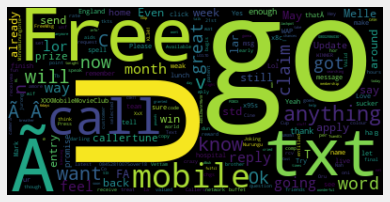

In [108]:
wc= WordCloud().generate(b)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()